# 深度卷积神经网络（AlexNet）



In [1]:
import sys
sys.path.append('..')

In [2]:
from d2l import mindspore as d2l
from mindspore import nn, Tensor, ops

net = nn.SequentialCell([
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, pad_mode='pad', padding=1, has_bias=True), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, pad_mode='pad', padding=2, has_bias=True), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, pad_mode='pad', padding=1, has_bias=True), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, pad_mode='pad', padding=1, has_bias=True), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, pad_mode='pad', padding=1, has_bias=True), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Dense(6400, 4096), nn.ReLU(),
    nn.Dropout(keep_prob=1-0.5),
    nn.Dense(4096, 4096), nn.ReLU(),
    nn.Dropout(keep_prob=1-0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Dense(4096, 10)])

d2l.init_cells(net=net)

我们构造一个
单通道数据，来观察每一层输出的形状

In [3]:
X = ops.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 (1, 96, 54, 54)
ReLU output shape:	 (1, 96, 54, 54)
MaxPool2d output shape:	 (1, 96, 26, 26)
Conv2d output shape:	 (1, 256, 26, 26)
ReLU output shape:	 (1, 256, 26, 26)
MaxPool2d output shape:	 (1, 256, 12, 12)
Conv2d output shape:	 (1, 384, 12, 12)
ReLU output shape:	 (1, 384, 12, 12)
Conv2d output shape:	 (1, 384, 12, 12)
ReLU output shape:	 (1, 384, 12, 12)
Conv2d output shape:	 (1, 256, 12, 12)
ReLU output shape:	 (1, 256, 12, 12)
MaxPool2d output shape:	 (1, 256, 5, 5)
Flatten output shape:	 (1, 6400)
Dense output shape:	 (1, 4096)
ReLU output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 4096)
ReLU output shape:	 (1, 4096)
Dropout output shape:	 (1, 4096)
Dense output shape:	 (1, 10)


Fashion-MNIST图像的分辨率
低于ImageNet图像。
我们将它们增加到$224 \times 224$

In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

训练AlexNet

loss 0.352, train acc 0.932, test acc 0.875
3439.4 examples/sec


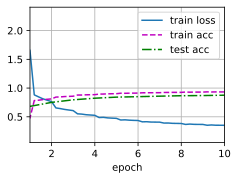

In [5]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)